<a href="https://colab.research.google.com/github/IjeomaOdoko/Federal-Debt-GDP-and-Oil-Prices/blob/master/WCS_WTI_prices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets used are as follows: 

WTI Source: U.S. Energy Information Administration (Jan 1986 to present). 
WCS Source: Alberta Energy (Jan 2009 to present) 

[Alberta Government - Economic DashBoard](https://economicdashboard.alberta.ca/OilPrice) 

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from google.colab import files


# Load Datasets

In [ ]:
uploaded = files.upload()

Saving download.csv to download.csv


In [ ]:
import io

wti_wcs_prices= pd.read_csv(io.StringIO(uploaded['download.csv'].decode('utf-8')), header=0, parse_dates=['When', 'ModifiedDate'])

# Explore and Transform WTI_WCS prices Dataset 

In [ ]:
wti_wcs_prices.head()

,Id,When,Type,Unit,Alberta,ModifiedDate
0,138641,1983-04-01,WTI,$US/bbl,30.50,2020-08-25 07:56:57
1,138642,1983-05-01,WTI,$US/bbl,30.16,2020-08-25 07:56:57
2,138643,1983-06-01,WTI,$US/bbl,30.96,2020-08-25 07:56:57
3,138644,1983-07-01,WTI,$US/bbl,31.59,2020-08-25 07:56:57
4,138645,1983-08-01,WTI,$US/bbl,31.88,2020-08-25 07:56:57


In [ ]:
   wti_wcs_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            1025 non-null   int64         
 1   When          1025 non-null   datetime64[ns]
 2   Type          1025 non-null   object        
 3   Unit          1025 non-null   object        
 4   Alberta       1025 non-null   float64       
 5   ModifiedDate  1025 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 48.2+ KB


In [ ]:
# check unique values for the objects 
print(wti_wcs_prices['Type'].unique())

print('\n')

print(wti_wcs_prices['Unit'].unique())

['WTI' 'WCS' 'NatGas']


['$US/bbl' '$CDN/GJ']


In [ ]:
# add month and Year columns 

wti_wcs_prices['Year'] = wti_wcs_prices['When'].dt.year
wti_wcs_prices['Month'] = wti_wcs_prices['When'].dt.month

wti_wcs_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            1025 non-null   int64         
 1   When          1025 non-null   datetime64[ns]
 2   Type          1025 non-null   object        
 3   Unit          1025 non-null   object        
 4   Alberta       1025 non-null   float64       
 5   ModifiedDate  1025 non-null   datetime64[ns]
 6   Year          1025 non-null   int64         
 7   Month         1025 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 64.2+ KB


In [ ]:
# create dataframe from unique value for type

def create_new_frame(type):
  x = wti_wcs_prices.loc[wti_wcs_prices['Type']==type].drop(columns='ModifiedDate').rename(columns={'When': 'Date', 'Alberta':'Price'})
  return x

In [ ]:
# create dataframe for WTI prices and explore data 

WTI_prices = create_new_frame('WTI')

display(WTI_prices.head())
print('\n')
print(WTI_prices.info())
print('\n')
print(WTI_prices['Unit'].unique())


,Id,Date,Type,Unit,Price,Year,Month
0,138641,1983-04-01,WTI,$US/bbl,30.50,1983,4
1,138642,1983-05-01,WTI,$US/bbl,30.16,1983,5
2,138643,1983-06-01,WTI,$US/bbl,30.96,1983,6
3,138644,1983-07-01,WTI,$US/bbl,31.59,1983,7
4,138645,1983-08-01,WTI,$US/bbl,31.88,1983,8




<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 1023
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Id      448 non-null    int64         
 1   Date    448 non-null    datetime64[ns]
 2   Type    448 non-null    object        
 3   Unit    448 non-null    object        
 4   Price   448 non-null    float64       
 5   Year    448 non-null    int64         
 6   Month   448 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 28.0+ KB
None


['$US/bbl']


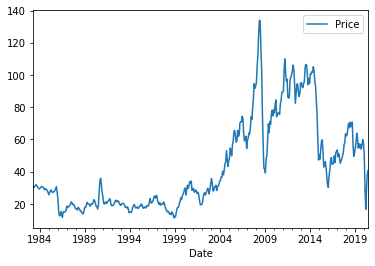

In [ ]:
WTI_prices.plot(kind='line', x='Date', y='Price')
plt.show()

In [ ]:
# create dataframe for WCS prices and explore data 

WCS_prices = create_new_frame('WCS')

display(WCS_prices.head())
print('\n')
print(WCS_prices.info())
print('\n')
print(WCS_prices['Unit'].unique())

,Id,Date,Type,Unit,Price,Year,Month
443,139084,2005-01-01,WCS,$US/bbl,29.42,2005,1
444,139085,2005-02-01,WCS,$US/bbl,28.44,2005,2
445,139086,2005-03-01,WCS,$US/bbl,36.50,2005,3
446,139087,2005-04-01,WCS,$US/bbl,31.02,2005,4
447,139088,2005-05-01,WCS,$US/bbl,27.46,2005,5




<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 443 to 1022
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Id      187 non-null    int64         
 1   Date    187 non-null    datetime64[ns]
 2   Type    187 non-null    object        
 3   Unit    187 non-null    object        
 4   Price   187 non-null    float64       
 5   Year    187 non-null    int64         
 6   Month   187 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 11.7+ KB
None


['$US/bbl']


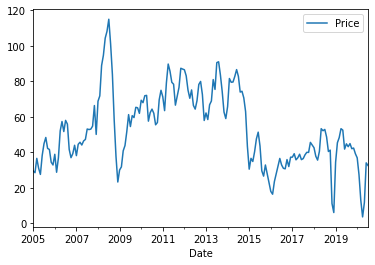

In [ ]:
WCS_prices.plot(kind='line', x='Date', y='Price')
plt.show()

In [ ]:
# create dataframe for NatGas prices and explore data 

NatGas_prices = create_new_frame('NatGas')

display(NatGas_prices.head())
print('\n')
print(NatGas_prices.info())
print('\n')
print(NatGas_prices['Unit'].unique())

,Id,Date,Type,Unit,Price,Year,Month
625,139266,1988-01-01,NatGas,$CDN/GJ,1.56,1988,1
626,139267,1988-02-01,NatGas,$CDN/GJ,1.63,1988,2
627,139268,1988-03-01,NatGas,$CDN/GJ,1.60,1988,3
628,139269,1988-04-01,NatGas,$CDN/GJ,1.53,1988,4
629,139270,1988-05-01,NatGas,$CDN/GJ,1.48,1988,5




<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 625 to 1024
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Id      390 non-null    int64         
 1   Date    390 non-null    datetime64[ns]
 2   Type    390 non-null    object        
 3   Unit    390 non-null    object        
 4   Price   390 non-null    float64       
 5   Year    390 non-null    int64         
 6   Month   390 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 24.4+ KB
None


['$CDN/GJ']


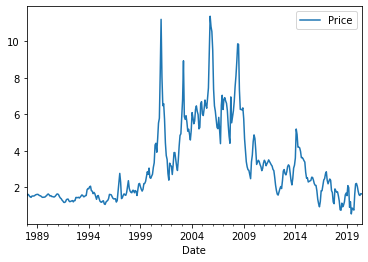

In [ ]:
NatGas_prices.plot(kind='line', x='Date', y='Price')
plt.show()

# Rename, drop columns and Set index to Date for all datasets

In [ ]:
NatGas_prices = NatGas_prices.rename(columns={'Price': 'NatGas_Price($CDN/GJ)'}).drop(columns=['Type', 'Unit', 'Id', 'Month', 'Year']).set_index('Date')

NatGas_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 1988-01-01 to 2020-06-01
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NatGas_Price($CDN/GJ)  390 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [ ]:
WTI_prices = WTI_prices.rename(columns={'Price': 'WTI_Price($US/bbl)'}).drop(columns=['Type', 'Unit', 'Id', 'Month', 'Year']).set_index('Date')
WCS_prices = WCS_prices.rename(columns={'Price': 'WCS_Price($US/bbl)'}).drop(columns=['Type', 'Unit','Id', 'Month', 'Year']).set_index('Date')

# Join all dataframes

In [ ]:
merged_WTI_WCS = WTI_prices.join(WCS_prices)
merged_WTI_WCS_NatGas = merged_WTI_WCS.join(NatGas_prices)

merged_WTI_WCS_NatGas.tail()

,WTI_Price($US/bbl),WCS_Price($US/bbl),NatGas_Price($CDN/GJ)
Date,,,
2020-03-01,29.21,12.84,1.60
2020-04-01,16.55,3.50,1.56
2020-05-01,28.56,11.67,1.66
2020-06-01,38.31,33.97,1.65
2020-07-01,40.71,32.50,NaN


In [ ]:
merged_WTI_WCS_NatGas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 448 entries, 1983-04-01 to 2020-07-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WTI_Price($US/bbl)     448 non-null    float64
 1   WCS_Price($US/bbl)     187 non-null    float64
 2   NatGas_Price($CDN/GJ)  390 non-null    float64
dtypes: float64(3)
memory usage: 34.0 KB


# Download Modified Dataset 

In [ ]:
merged_WTI_WCS_NatGas.to_csv("WTI_WCS_NatGas_Prices.csv", sep=",", index=True)
files.download("WTI_WCS_NatGas_Prices.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>